In [5]:
import importlib

import utils

importlib.reload(utils)
from utils import fit_task_loss_from_ladder_models, plot_actual_vs_predicted, plot_fit

In [2]:
ENTITY = "stanford-mercury"
PROJECT = "marin"

# define the list of smaller runs to use as "ladder" models
RUNS = [
    "tootsie-scaling-512-81c36c",
    "tootsie-scaling-768-d17a90",
    "tootsie-scaling-1024-f4e4be",
    "tootsie-scaling-1536-e2a6d8",
    "tootsie-scaling-2048-72c648",
]

# the large run to predict the performance of
PRED_RUN = "llama-8b-tootsie-0.001-19ad63"

# define the eval task loss metric
TASK_LOSS = "eval/paloma/c4_en/bpb"
# TASK_LOSS = "internal_eval/mmlu/bpb"

# do we want to take the last step of the run or average over all steps, or just use all steps?
AGGREGATION = "all"

TOKENS_COL = "throughput/total_tokens"
PARAM_COL = "parameter_count"
PARAM_COL_TO_USE = "computed_params"

Fitted params (small runs): (np.float64(0.5912407998703356), np.float64(0.32552829988346244), np.float64(1.7209934883251436), np.float64(1.0393213322392638), np.float64(0.017749806094150593))


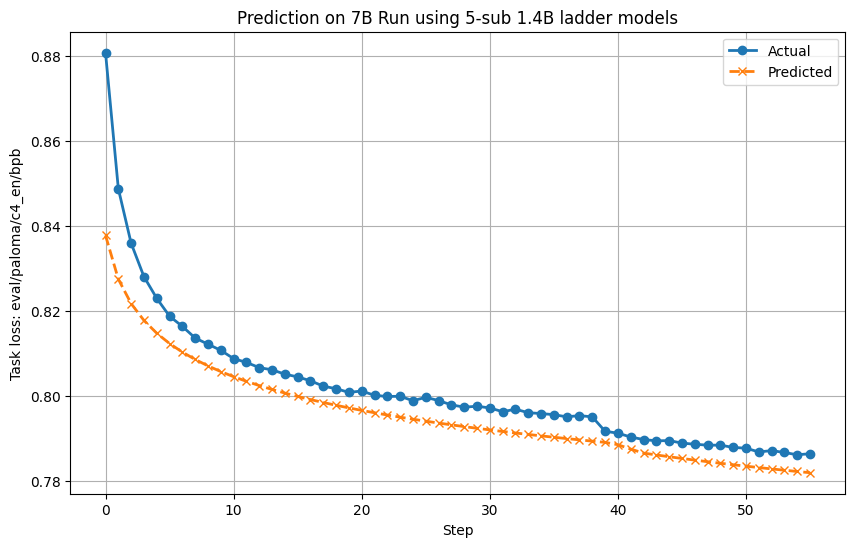

In [4]:
actual, predicted = fit_task_loss_from_ladder_models(
        runs=RUNS,
        entity=ENTITY,
        project=PROJECT,
        metrics=[TASK_LOSS, TOKENS_COL],
        pred_run=PRED_RUN,
        task_loss=TASK_LOSS,
        aggregation=AGGREGATION,
        tokens_col=TOKENS_COL,
        param_col=PARAM_COL,
        param_col_to_use=PARAM_COL,
        use_log_for_ND=True,
        normalize_ND=True,
    )

plot_actual_vs_predicted(actual, predicted, title="Prediction on 7B Run using 5-sub 1.4B ladder models")

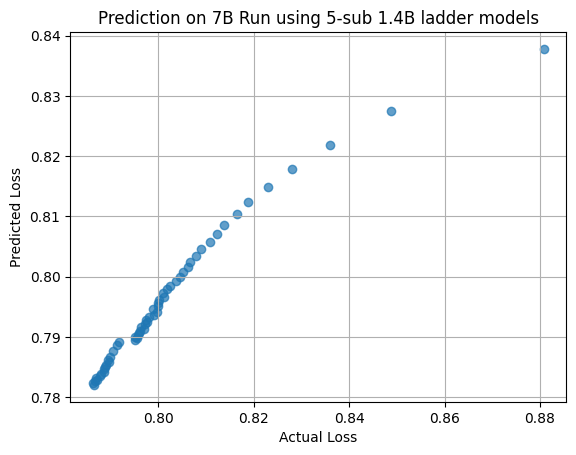

In [6]:
plot_fit(actual, predicted, title="Prediction on 7B Run using 5-sub 1.4B ladder models")